In [1]:
import gc, os, json, tqdm, time
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from util.input_data import Dataset
import gc

%matplotlib inline

In [3]:
from util.input_data import Dataset
import gc

gc.collect()
dataset = Dataset(
    path = 'c:/WORKSPACE_KRICT/DATA/data_snu/with_metal',
    r_max=8, rb_max=5, dr=0.05, dt=0.02, pfx='POSCAR_ICSD-', sfx='', dfn='id_target.test.csv',
    scale_atom=False, scale_rdf=False, scale_bdf=False)
dataset.generate_data()
dataset.save_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/testdata_metal_FFF.pickle', silent=True)

gc.collect()
dataset = Dataset(
    path = 'c:/WORKSPACE_KRICT/DATA/data_snu/with_metal',
    r_max=8, rb_max=5, dr=0.05, dt=0.02, pfx='POSCAR_ICSD-', sfx='', dfn='id_target.test.csv',
    scale_atom=True, scale_rdf=False, scale_bdf=False)
dataset.generate_data()
dataset.save_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/testdata_metal_TFF.pickle', silent=True)

gc.collect()
dataset = Dataset(
    path = 'c:/WORKSPACE_KRICT/DATA/data_snu/with_metal',
    r_max=8, rb_max=5, dr=0.05, dt=0.02, pfx='POSCAR_ICSD-', sfx='', dfn='id_target.test.csv',
    scale_atom=False, scale_rdf=True, scale_bdf=True)
dataset.generate_data()
dataset.save_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/testdata_metal_FTT.pickle', silent=True)

gc.collect()
dataset = Dataset(
    path = 'c:/WORKSPACE_KRICT/DATA/data_snu/with_metal',
    r_max=8, rb_max=5, dr=0.05, dt=0.02, pfx='POSCAR_ICSD-', sfx='', dfn='id_target.test.csv',
    scale_atom=True, scale_rdf=True, scale_bdf=True)
dataset.generate_data()
dataset.save_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/testdata_metal_TTT.pickle', silent=True)

Generating data:  82%|████████▏ | 1500/1837 [14:02<02:51,  1.97it/s] 

In [2]:
dset = Dataset()
for setname in [
    'inputdata_metal_FFF.pickle','inputdata_metal_FTT.pickle','inputdata_metal_TFF.pickle','inputdata_metal_TTT.pickle',
    'testdata_metal_FFF.pickle','testdata_metal_FTT.pickle','testdata_metal_TFF.pickle','testdata_metal_TTT.pickle'
]:
    dset.load_dataset(f'C:/WORKSPACE_KRICT/DATA/data_snu/{setname}', True)
    dset.idx_id = 0
    dset.idx_ref = 1
    dset.idx_tgt = 3
    dset.save_dataset(f'C:/WORKSPACE_KRICT/DATA/data_snu/{setname}.idx', True)

### Dataset 이슈
 - TTT 데이터의 train 과정 중 생성한 prediction이 재현되지 않음. 
 - TTT 데이터의 오류 검증을 위한 파트

In [70]:
from util.input_data import Dataset
DSS = Dataset()
DSO = Dataset()
DSS.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/inputdata_metal_FFF.pickle', silent=True)
DSS.scale_all_data(scale_atom=True, scale_rdf=False, scale_bdf=False)
DSO.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/inputdata_metal_TFF.pickle', silent=True)

Scaling data: 100%|██████████| 18605/18605 [00:01<00:00, 12768.27it/s]


In [6]:
dssd = DSS.__dict__
dsod = DSO.__dict__
for k, sd in dssd.items():
    od = dsod[k]
    if 'crystal' in k:
        print('Num. Data: \t {} \t {}'.format(len(sd), len(od)))
    else:
        if len(str(sd)) < 10:
            print('{}: \t {} \t {}'.format(k, sd, od))
        else:
            print('{}:'.format(k))
            print(sd)
            print(od)
# Atom feature가 scaleling이 안되어있음...

path:
c:/WORKSPACE_KRICT/DATA/data_snu/with_metal
c:/WORKSPACE_KRICT/DATA/data_snu/with_metal
r_max: 	 8 	 8
rb_max: 	 5 	 5
dr: 	 0.05 	 0.05
dt: 	 0.02 	 0.02
pfx:
POSCAR_ICSD-
POSCAR_ICSD-
sfx: 	  	 
dfn:
id_target.csv
id_target.csv
afn:
['atomic_number', 'atomic_volume', 'block', 'covalent_radius_pyykko', 'electron_affinity', 'electronic_configuration', 'en_pauling', 'fusion_heat', 'metallic_radius', 'vdw_radius_bondi', 'period']
['atomic_number', 'atomic_volume', 'block', 'covalent_radius_pyykko', 'electron_affinity', 'electronic_configuration', 'en_pauling', 'fusion_heat', 'metallic_radius', 'vdw_radius_bondi', 'period']
_scale_atom: 	 False 	 False
_scale_rdf: 	 False 	 False
_scale_bdf: 	 False 	 False
rgd:
bgd:
n_rdf_feature: 	 161 	 161
n_bdf_feature: 	 159 	 159
Num. Data: 	 18605 	 18605
mat_atom_feats:
[[0.03608635 1.24219915 0.         ... 0.         0.         4.005     ]
 [0.0721727  2.80155554 0.         ... 0.         0.         7.24145799]
 [0.10825905 1.15409992 0. 

KeyError: 'scale_atom'

In [8]:
dssd.keys(), dsod.keys()

(dict_keys(['path', 'r_max', 'rb_max', 'dr', 'dt', 'pfx', 'sfx', 'dfn', 'afn', '_scale_atom', '_scale_rdf', '_scale_bdf', 'rgd', 'bgd', 'n_rdf_feature', 'n_bdf_feature', 'crystal', 'mat_atom_feats', 'n_atom_feats', 'scale_atom', 'scale_rdf', 'scale_bdf']),
 dict_keys(['path', 'r_max', 'rb_max', 'dr', 'dt', 'pfx', 'sfx', 'dfn', 'afn', '_scale_atom', '_scale_rdf', '_scale_bdf', 'rgd', 'bgd', 'n_rdf_feature', 'n_bdf_feature', 'crystal', 'mat_atom_feats', 'n_atom_feats']))

In [71]:
for i in range(3):
    crs = DSS.crystal[i]
    cro = DSO.crystal[i]
    crsd = crs.__dict__
    crod = cro.__dict__
    for k, sd in crsd.items():
        od = crod[k]
        if len(str(sd)) < 10:
            print('{}: \t {} \t {}'.format(k, sd, od))
        else:
            print('{}:'.format(k))
            print(sd)
            print(od)
# 데이터 들여다보면 Atomic feature는 scale 되어있는데 RDF/BDF가 차이가있음. 아ㅣㅏㄸㅆ히망ㅎㄴ

atom_feature:
tensor([[1.8765, 1.8060, 1.0174,  ..., 0.0000, 0.0000, 4.0108],
        [1.8765, 1.8060, 1.0174,  ..., 1.1763, 0.0000, 1.9929],
        [1.8765, 1.8060, 1.0174,  ..., 2.3525, 0.0000, 2.6535],
        ...,
        [0.2887, 1.2334, 1.0174,  ..., 0.0000, 0.0000, 4.0108],
        [0.2887, 1.2334, 1.0174,  ..., 1.1763, 0.0000, 1.9929],
        [0.2887, 1.2334, 1.0174,  ..., 2.3525, 0.0000, 2.6535]])
tensor([[1.8765, 1.8060, 1.0174,  ..., 0.0000, 0.0000, 4.0108],
        [1.8765, 1.8060, 1.0174,  ..., 1.1763, 0.0000, 1.9929],
        [1.8765, 1.8060, 1.0174,  ..., 2.3525, 0.0000, 2.6535],
        ...,
        [0.2887, 1.2334, 1.0174,  ..., 0.0000, 0.0000, 4.0108],
        [0.2887, 1.2334, 1.0174,  ..., 1.1763, 0.0000, 1.9929],
        [0.2887, 1.2334, 1.0174,  ..., 2.3525, 0.0000, 2.6535]])
rdf_feature:
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.8256e-02, 3.7040e-02,
         3.4849e-02],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.9182e-05, 6.9786e-08,
     

In [72]:
# 테스트를 위해 FTT 불러옴
from util.input_data import Dataset
#DSB = Dataset()
#DSS = Dataset()
#DST3 = Dataset()
#DSFI = Dataset()
#DSFT = Dataset()
#DSFI.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/inputdata_metal_FFF.pickle', silent=True)
#DSFT.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/testdata_metal_FFF.pickle', silent=True)
#DSB.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/inputdata_metal_FTT.pickle', silent=True)
#DSS.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/inputdata_metal_FTT.pickle', silent=True)
#DSS.scale_all_data(scale_atom=True, scale_rdf=True, scale_bdf=True)
#DST3.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/inputdata_metal_TTT3.pickle', silent=True)
DSTTFF = Dataset()
DSITFF = Dataset()
DSTTFF.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/inputdata_metal_TFF.pickle', silent=True)
DSITFF.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/testdata_metal_TFF.pickle', silent=True)

In [90]:
def get_info_from_cry(cry1, cry2):
    r2 = cry2.atom_feature[0,-1].item()
    r1 = cry1.atom_feature[0,-1].item()
    return r1, r2, r1/r2

def get_info(set1, set2):
    r2 = set2.crystal[0].rdf_feature[0,-1].item()
    r1 = set1.crystal[0].rdf_feature[0,-1].item()
    return r1, r2, r1/r2


In [79]:

DSFI.scale_all_data(scale_atom=True, scale_rdf=True, scale_bdf=True)    
DSFI.save_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/inputdata_metal_TTT.pickle', silent=True)
#print('Scale {} times - ratio: {:10.4f} / val: {:10.4f} / ref: {:10.4f}'.format(0, *get_info(DSF, DST3)))
for i in range(1, 4):
    DSFT.scale_all_data(scale_atom=True, scale_rdf=True, scale_bdf=True)
#    print('Scale {} times - ratio: {:10.4f} / val: {:10.4f} / ref: {:10.4f}'.format(i, *get_info(DSF, DST3)))
DSFT.save_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/testdata_metal_TTT3.pickle', silent=True)

Scaling data: 100%|██████████| 1837/1837 [00:00<00:00, 12125.99it/s]


In [76]:
DSF.scale_all_data(scale_atom=True, scale_rdf=False, scale_bdf=False)
DSF.crystal[0].atom_feature, DST3.crystal[0].atom_feature

Scaling data: 100%|██████████| 18605/18605 [00:00<00:00, 51853.51it/s]


(tensor([[1.8765, 1.8060, 1.0174,  ..., 0.0000, 0.0000, 4.0108],
         [1.8765, 1.8060, 1.0174,  ..., 1.1763, 0.0000, 1.9929],
         [1.8765, 1.8060, 1.0174,  ..., 2.3525, 0.0000, 2.6535],
         ...,
         [0.2887, 1.2334, 1.0174,  ..., 0.0000, 0.0000, 4.0108],
         [0.2887, 1.2334, 1.0174,  ..., 1.1763, 0.0000, 1.9929],
         [0.2887, 1.2334, 1.0174,  ..., 2.3525, 0.0000, 2.6535]]),
 tensor([[1.8765, 1.8060, 1.0174,  ..., 0.0000, 0.0000, 4.0108],
         [1.8765, 1.8060, 1.0174,  ..., 1.1763, 0.0000, 1.9929],
         [1.8765, 1.8060, 1.0174,  ..., 2.3525, 0.0000, 2.6535],
         ...,
         [0.2887, 1.2334, 1.0174,  ..., 0.0000, 0.0000, 4.0108],
         [0.2887, 1.2334, 1.0174,  ..., 1.1763, 0.0000, 1.9929],
         [0.2887, 1.2334, 1.0174,  ..., 2.3525, 0.0000, 2.6535]]))

In [64]:
'''
metal_FFF :  1    1      1
metal_FTT :  1    1/s    1/s
metal_TTT :  1/s  1/s^3  1/s^3 .... 어쩌다 세번이나....
scale_all_data를 수행할 경우 scale 되어있는 데이터임에도 다시 됨. 
scale 되었다는 데이터가 제대로 저장되지 않아 발생한 문제임.
'''

for i in range(3):
    crs = DSB.crystal[i] # 1
    cro = DSS.crystal[i] # 2
    crf = DSO.crystal[i] # 3
    atom1 = crs.atom_feature
    rstd1 = crs.std_rdf
    bstd1 = crs.std_bdf
    rdf1 = crs.rdf_feature
    bdf1 = crs.bdf_feature
    atom2 = cro.atom_feature
    rstd2 = cro.std_rdf
    bstd2 = cro.std_bdf
    rdf2 = cro.rdf_feature
    bdf2 = cro.bdf_feature
    atom3 = crf.atom_feature
    rstd3 = crf.std_rdf
    bstd3 = crf.std_bdf
    rdf3 = crf.rdf_feature
    bdf3 = crf.bdf_feature

    print('-'*50)
    print('              1/2           1/3           2/3')
    print('Atom / {:11.5f} / {:11.5f} / {:11.5f} / {:11.5f} / {:11.5f}'.format(
        (atom1/atom2)[0,0].item(), (atom1/atom3)[0,0].item(), (atom2/atom3)[0,0].item(), 
        atom1[0,0].item(), atom2[0,0].item()))
    print('RDF  / {:11.5f} / {:11.5f} / {:11.5f} / {:11.5f} / {:11.5f} / {:11.5f}'.format(
        (rdf1/rdf2)[0,-2].item(), (rdf1/rdf3)[0,-2].item(), (rdf2/rdf3)[0,-2].item(), 
        rstd1, 1/rstd1, 1/rstd1**2))
    print('BDF  / {:11.5f} / {:11.5f} / {:11.5f} / {:11.5f} / {:11.5f} / {:11.5f}'.format(
        (bdf1/bdf2)[0,25].item(), (bdf1/bdf3)[0,25].item(), (bdf2/bdf3)[0,25].item(), 
        bstd1, 1/bstd1, 1/bstd1**2))

--------------------------------------------------
              1/2           1/3           2/3
Atom /    27.71131 /    27.71131 /     1.00000 /    55.00000 /     1.98475
RDF  /     0.02933 /     1.00000 /    34.09911 /     0.02933 /    34.09911 /  1162.74961
BDF  /     0.45264 /     1.00000 /     2.20924 /     0.45264 /     2.20924 /     4.88074
--------------------------------------------------
              1/2           1/3           2/3
Atom /    27.71131 /    27.71131 /     1.00000 /    52.00000 /     1.87649
RDF  /     0.02584 /     1.00000 /    38.70330 /     0.02584 /    38.70330 /  1497.94581
BDF  /     0.38196 /     1.00000 /     2.61805 /     0.38196 /     2.61805 /     6.85416
--------------------------------------------------
              1/2           1/3           2/3
Atom /    27.71131 /    27.71131 /     1.00000 /    56.00000 /     2.02084
RDF  /     0.07148 /     1.00000 /    13.98930 /     0.07148 /    13.98930 /   195.70039
BDF  /     2.51413 /     1.00000 /     

In [59]:
rdff = DSF.crystal[0].bdf_feature/(DSF.crystal[0].std_bdf**3)
rdft = DSO.crystal[0].bdf_feature

ratio = rdff/rdft
print(ratio)

tensor([[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [   nan,    nan,    nan,  ..., 1.2500,    nan,    nan],
        [   nan,    nan,    nan,  ..., 1.0000, 1.0000, 1.0000],
        ...,
        [   nan,    nan,    nan,  ..., 1.0000, 1.0000, 1.0000],
        [   nan,    nan,    nan,  ..., 1.0000, 1.0000, 1.0000],
        [   nan,    nan,    nan,  ..., 1.0000, 1.0000, 1.0000]])


In [99]:
import numpy as np
#input_crys = [cry for cry in np.array(DSITFF.crystal)[np.array([0,1,2], dtype=int)]]
#test_crys  = [cry for cry in np.array(DSTTFF.crystal)[np.array([6,16,31], dtype=int)]]
#print([cry.id for cry in input_crys])
#print([cry.id for cry in test_crys])
for c1, c2 in zip(input_crys, test_crys):
    print(c1.rdf_feature/c2.rdf_feature)

tensor([[nan, nan, nan,  ..., 1., 1., 1.],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., 1., 1., 1.],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., 1., 1., 1.],
        [nan, nan, nan,  ..., nan, nan, nan]])
tensor([[nan, nan, nan,  ..., 1., 1., 1.],
        [nan, nan, nan,  ..., 1., 1., 1.],
        [nan, nan, nan,  ..., 1., 1., 1.],
        ...,
        [nan, nan, nan,  ..., 1., 1., 1.],
        [nan, nan, nan,  ..., 1., 1., 1.],
        [nan, nan, nan,  ..., 1., 1., 1.]])
tensor([[nan, nan, nan,  ..., 1., 1., 1.],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., 1., 1., 1.],
        [nan, nan, nan,  ..., 1., 1., 1.],
        [nan, nan, nan,  ..., nan, nan, nan]])


In [84]:
np.array(DSITFF.crystal)[np.array([0,1,2], dtype=int)]

array([<util.data.DistributionData object at 0x000001A95FE9B970>,
      dtype=object)

#### Test dataset도 체크

In [60]:
# 테스트를 위해 FTT 불러옴
from util.input_data import Dataset
DSB = Dataset()
DSS = Dataset()
DSO = Dataset()
DSF = Dataset()
DSF.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/testdata_metal_FFF.pickle', silent=True)
DSB.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/testdata_metal_FTT.pickle', silent=True)
DSS.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/testdata_metal_FTT.pickle', silent=True)
DSS.scale_all_data(scale_atom=True, scale_rdf=True, scale_bdf=True)
DSO.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/testdata_metal_TTT.pickle', silent=True)
# 잘 되어있음

Scaling data: 100%|██████████| 1837/1837 [00:01<00:00, 1207.83it/s]


#### 수정 후 검증

In [1]:
from util.input_data import Dataset
DSF = Dataset()
DSF.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/testdata_metal_FFF.pickle', silent=True)
for i in range(3):
    print(i, DSF.crystal[0].rdf_feature[0,-1])
    DSF.scale_all_data(scale_atom=True, scale_rdf=True, scale_bdf=True)

0 tensor(4.0629e-24)


Scaling data: 100%|██████████| 1837/1837 [00:00<00:00, 13258.06it/s]

1 tensor(1.3854e-22)
2 tensor(1.3854e-22)


In [1]:
from util.input_data import Dataset
DSF = Dataset()
DSF.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/inputdata_metal_FFF.pickle', silent=True)
DST = Dataset()
DST.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/inputdata_metal_TTT.pickle', silent=True)

In [2]:
i = 10
DSF.crystal[i].rdf_feature/DST.crystal[i].rdf_feature, DSF.crystal[i].std_rdf, 1/DSF.crystal[i].std_rdf, DSF.crystal[i].bdf_feature/DST.crystal[i].bdf_feature, DSF.crystal[i].std_bdf, 1/DSF.crystal[i].std_bdf

(tensor([[   nan,    nan,    nan,  ..., 0.0450, 0.0450, 0.0450],
         [   nan,    nan,    nan,  ..., 0.0450, 0.0450, 0.0450],
         [   nan,    nan,    nan,  ..., 0.0450, 0.0450, 0.0450],
         ...,
         [   nan,    nan,    nan,  ..., 0.0450, 0.0450, 0.0450],
         [   nan,    nan,    nan,  ..., 0.0450, 0.0450, 0.0450],
         [   nan,    nan,    nan,  ..., 0.0450, 0.0450, 0.0450]]),
 0.04504996318685753,
 22.197576407603613,
 tensor([[   nan,    nan,    nan,  ..., 0.5724, 0.5724, 0.5724],
         [   nan,    nan,    nan,  ...,    nan,    nan,    nan],
         [   nan,    nan,    nan,  ..., 0.5724, 0.5724, 0.5724],
         ...,
         [   nan,    nan,    nan,  ...,    nan,    nan,    nan],
         [   nan,    nan,    nan,  ..., 0.5724, 0.5724, 0.5724],
         [   nan,    nan,    nan,  ...,    nan,    nan,    nan]]),
 0.5724418582209106,
 1.7469023021969345)

In [2]:
from util.input_data import Dataset
import gc

gc.collect()
dataset = Dataset(
    path = 'c:/WORKSPACE_KRICT/DATA/data_snu/with_metal',
    r_max=8, rb_max=5, dr=0.05, dt=0.02, pfx='POSCAR_ICSD-', sfx='', dfn='id_target.subset.csv',
    scale_atom=False, scale_rdf=False, scale_bdf=False)
dataset.generate_data()
dataset.save_dataset('C:\WORKSPACE_KRICT\DATA\data_snu/inputdata_subset.pickle', silent=True)


Generating data: 100%|██████████| 9/9 [00:02<00:00,  3.26it/s]


In [3]:
from pymatgen.core.structure import Structure

cry = Structure.from_file('C:/WORKSPACE_KRICT/DATA/data_snu/with_metal/source/POSCAR_ICSD-16')
nbr = cry.get_all_neighbors(8, include_index=True)

In [20]:
l  = []
for i_nbr in nbr[0]:
    r = i_nbr[1]
    ia = i_nbr[2]
    l.append((r, ia))
sl = sorted(l, key=lambda x:x[0])
print([ia for _, ia in sl])
print(sl)

[19, 20, 18, 21, 17, 16, 13, 12, 15, 8, 6, 10, 11, 14, 4, 9, 5, 7, 3, 3, 2, 3, 2, 2, 3, 2, 7, 4, 11, 10, 14, 5, 9, 6, 12, 8, 15, 13, 1, 1, 1, 1, 1, 1, 7, 7, 5, 9, 10, 10, 14, 13, 9, 15, 4, 4, 13, 8, 5, 11, 14, 6, 11, 15, 12, 12, 6, 8, 17, 16, 21, 16, 16, 16, 21, 17, 17, 17, 21, 21, 20, 18, 19, 18, 20, 19, 20, 19, 19, 18, 20, 18, 10, 4, 13, 14, 7, 11, 15, 8, 12, 6, 9, 5, 8, 12, 6, 15, 12, 11, 14, 7, 6, 11, 7, 5, 13, 4, 15, 9, 4, 14, 13, 10, 10, 9, 5, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 18, 18, 18, 20, 19, 21, 20, 19, 19, 17, 21, 19, 17, 20, 16, 21, 20, 16, 17, 16, 21, 17, 16]
[(2.1681098818659006, 19), (2.1681098818659006, 20), (2.1681098818659006, 18), (2.1681098818659015, 21), (2.1681098818659015, 17), (2.1681098818659015, 16), (3.0208520191230033, 13), (3.0208520191230033, 12), (3.0208520191230033, 15), (3.0208520191230033, 8), (3.0208520191230033, 6), (3.0208520191230037, 10), (3.0208520191230037, 11), (3.0208520191230037, 14), (3.0208520191230037, 4), (3.0208520191230046, 9)

In [4]:
import pandas as pd
df = pd.read_csv('C:\WORKSPACE_KRICT\DATA\data_snu\with_metal/id_target.csv')
df

,icsd_number,gap_gga,gap_type_gga,gap_hse,gap_type_hse,space_group,magnetic_ordering
0,1,2.169719,Direct,3.338327,Direct,14.0,FM
1,8,1.863341,Indirect,2.667696,Indirect,62.0,NM
2,9,1.660507,Indirect,3.694056,Indirect,14.0,AFM
3,16,0.000000,Null,0.000000,Null,NaN,NaN
4,19,2.127657,Indirect,3.769436,Direct,81.0,NM
...,...,...,...,...,...,...,...
18600,660135,0.000000,Null,0.000000,Null,NaN,NaN
18601,660381,0.779585,Indirect,1.331126,Indirect,4.0,NM
18602,710052,0.058523,Indirect,1.273395,Direct,15.0,NM
18603,710063,1.379217,Direct,2.272700,Direct,62.0,NM


In [2]:
from util.input_data import Dataset

dummy = Dataset()
dummy.load_dataset(f'C:\WORKSPACE_KRICT\DATA\data_snu\inputdata_metal_FFF.pickle', silent=True)
path = 'C:/WORKSPACE_KRICT/MODELS/202204/nmre'
for mr in [0.0, 0.01, 0.025, 0.05, 0.1, 0.2, 0.4, 0.6, 1]:
    dummy.train_test_split(train_ratio=0.7, valid_ratio=0.2, rseed=35,
                        metal_ratio=mr, save_ids=True, path=path)
    out = os.path.join(path, 'ids.json')
    re  = os.path.join(path, 'ids_m{:.3f}.json'.format(mr))
    os.rename(out, re)

0% of metal data used - 0 metal with 10387 insulator (0%)
1% of metal data used - 90 metal with 10387 insulator (1%)
2% of metal data used - 219 metal with 10387 insulator (2%)
5% of metal data used - 435 metal with 10387 insulator (4%)
10% of metal data used - 858 metal with 10387 insulator (8%)
20% of metal data used - 1649 metal with 10387 insulator (14%)
40% of metal data used - 3285 metal with 10387 insulator (24%)
60% of metal data used - 4983 metal with 10387 insulator (32%)
100% of metal data used - 8218 metal with 10387 insulator (44%)


#### Insulator & Metal 비율 분석

In [4]:
dset = Dataset()
dset.load_dataset('C:\WORKSPACE_KRICT\DATA\material/data_snu\inputdata_metal_FFF.pickle.idx')

In [5]:
df = pd.read_csv('C:/WORKSPACE_KRICT/DATA/material/data_snu/with_metal/id_target.csv')
ndim = 720000
hse_mask = np.zeros((ndim), dtype=bool)
hse_mask[np.array(df[df.gap_hse != 0].icsd_number)] = True
gga_mask = np.zeros((ndim), dtype=bool)
gga_mask[np.array(df[df.gap_gga != 0].icsd_number)] = True
all_mask = np.zeros((ndim), dtype=bool)
all_mask[np.array(df.icsd_number)] = True


for mr in [0, 0.01, 0.025, 0.05, 0.1, 0.2, 1]:
    tmask = np.zeros((ndim), dtype=bool)
    vmask = np.zeros((ndim), dtype=bool)
    t, v, _ = dset.train_test_split(train_ratio=0.7, metal_ratio=mr)
    tmask[np.array([c.id for c in t], dtype=int)] = True
    vmask[np.array([c.id for c in v], dtype=int)] = True
    
    print('MR: {:.3f} | {:5d} | {:5d} | {:5d}'.format(
        mr, np.sum(tmask & hse_mask), 
        np.sum(tmask & hse_mask & ~gga_mask), np.sum(tmask & ~hse_mask)
    ))



0% of metal data used - 0 metal with 10387 insulator (0%)
MR: 0.000 |  7270 |   279 |     0
1% of metal data used - 90 metal with 10387 insulator (1%)
MR: 0.010 |  7275 |   280 |    58
2% of metal data used - 219 metal with 10387 insulator (2%)
MR: 0.025 |  7275 |   280 |   149
5% of metal data used - 435 metal with 10387 insulator (4%)
MR: 0.050 |  7276 |   280 |   299
10% of metal data used - 858 metal with 10387 insulator (8%)
MR: 0.100 |  7265 |   279 |   606
20% of metal data used - 1649 metal with 10387 insulator (14%)
MR: 0.200 |  7265 |   279 |  1160
100% of metal data used - 8218 metal with 10387 insulator (44%)
MR: 1.000 |  7279 |   280 |  5744


#### HSE Band gap 분포

In [1]:
from util.input_data import Dataset
import torch
dummy = Dataset()
dummy.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu\inputdata_metal_FFF.pickle', silent=True)

In [3]:
target = np.array([cry.gap_hse.numpy().squeeze() for cry in dummy.crystal])

In [60]:
met_mask = target == 0
ins_mask = target != 0
new_mask = met_mask.astype(int)*np.random.rand(met_mask.shape[0]) > (1 - 0.1)
mask = ins_mask | new_mask

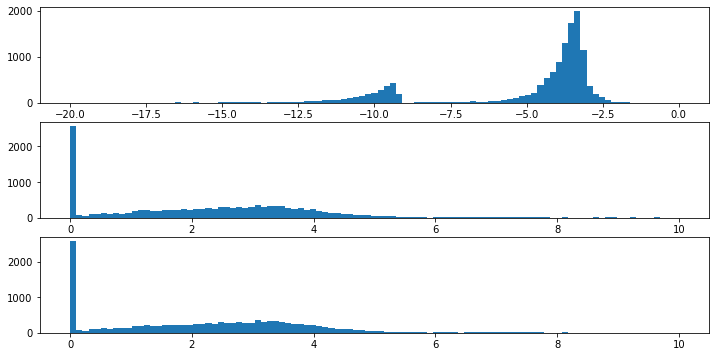

In [129]:
x = np.log(target[mask]/100 + 1e-4*np.random.rand(np.sum(mask)))
f, axs = plt.subplots(3, 1, figsize=(12, 6))
#_ = axs[0].hist(target, bins=np.linspace(0,10,100))
#_ = axs[1].hist(target[mask], bins=np.linspace(0,10,100))
_ = axs[0].hist(x, bins=np.linspace(-20, 0, 100))
_ = axs[1].hist(np.exp(x)*100, bins=np.linspace(0,10,100))
_ = axs[2].hist(target[mask], bins=np.linspace(0,10,100))

In [128]:
np.average(np.abs(np.exp(x)*100 - target[mask]))

0.005010663558738311

In [12]:
met_mask = target == 0
ins_mask = target != 0
new_mask = met_mask.astype(int)*np.random.rand(met_mask.shape[0]) > (1 - 0.3)
mask = ins_mask | new_mask

np.sum(met_mask), np.sum(new_mask), float(np.sum(new_mask))/np.sum(met_mask), float(np.sum(new_mask))/np.sum(mask)

(8218, 2467, 0.3001946945728888, 0.19192469270266066)

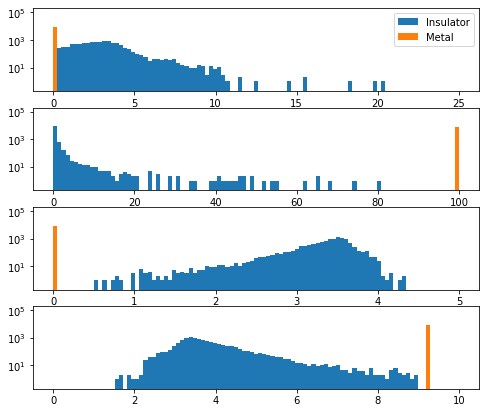

In [103]:
x1 = target[target != 0]
x2 = target[target == 0] + 1e-2
f, axs = plt.subplots(4, 1, figsize=(8, 7))

axs[0].hist(x1, bins=np.linspace(0,25,100), label='Insulator')
axs[1].hist(1/(x1), bins=np.linspace(0, 100, 100))
axs[2].hist(np.log10(x1-1e-2+1e-3) + 3, bins=np.linspace(0,5,100))
axs[3].hist(np.log(100/x1) , bins=np.linspace(0,10,100))

axs[0].hist(x2, bins=np.linspace(0,25,100), label='Metal')
axs[1].hist(1/(x2), bins=np.linspace(0, 100, 100))
axs[2].hist(np.log10(x2-1e-2+1e-3) + 3, bins=np.linspace(0,5,100))
axs[3].hist(np.log(100/x2) , bins=np.linspace(0,10,100))

axs[0].legend(loc='upper right')
for ax in axs: 
    ax.set_ylim([0.2,200000])
    ax.set_yscale('log')
    



In [97]:
np.log(1000/10), np.log(1000/0.001)

(4.605170185988092, 13.815510557964274)

In [83]:
ids = np.array([cry.id for cry in dummy.crystal])
gga = np.array([cry.gap_gga.numpy().squeeze() for cry in dummy.crystal])

ids[(gga == 0) & (target != 0)]

array([    31,    154,    193,   1404,   1430,   2277,   2312,   2607,
         2857,   5029,   8058,   8150,   8278,   9038,   9135,  10017,
        10148,  10432,  12145,  12150,  12152,  12153,  12159,  15412,
        15882,  16537,  16539,  16950,  18008,  18319,  20012,  20087,
        20229,  20361,  20459,  20901,  24073,  24482,  24646,  24692,
        25551,  25718,  25719,  25737,  26264,  26557,  26612,  27092,
        27394,  27502,  27761,  27877,  27988,  28232,  28742,  30219,
        30368,  30526,  30602,  30691,  31111,  31353,  31399,  31982,
        32021,  33847,  33911,  35121,  35122,  35634,  36295,  36433,
        36466,  36535,  38138,  38843,  40044,  40296,  40908,  41260,
        41501,  41675,  41705,  41831,  41938,  41980,  42075,  42119,
        42135,  42137,  42149,  42151,  42458,  42672,  42876,  43242,
        43435,  43690,  43875,  43993,  44066,  44706,  44807,  44914,
        44916,  47164,  49742,  50707,  50990,  52008,  52380,  52430,
      

In [65]:
import pickle
with open('C:\WORKSPACE_KRICT\DATA\data_snu\inputdata_orig_TFF.pickle','rb') as f:
    cobj = pickle.load(f)

In [1]:
from util.trainer_graph import collate_fn
from util.input_data import Dataset

#dummy = Dataset()
#dummy.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu\inputdata_metal_TFF.pickle', silent=True)
#dummy.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu\inputdata_orig_TFF.pickle', silent=True)
dataset = Dataset(
    path = 'c:/WORKSPACE_KRICT/DATA/data_snu/with_metal',
    r_max=8, rb_max=5, dr=0.05, dt=0.02, pfx='POSCAR_ICSD-', sfx='', dfn='id_target.subset.csv',
    scale_atom=True, scale_rdf=True, scale_bdf=True)
dataset.generate_data()
batch = dataset.crystal[:2]
atom_feat, rdf_feat, bdf_feat, atom_idx, ele1_idx, ele2_idx, nbr_idx, graph_idx, gap_gga, gap_hse, ids = collate_fn(batch=batch)

atom_feat = atom_feat.cpu()
rdf_feat = rdf_feat.cpu()
bdf_feat = bdf_feat.cpu()
atom_idx = atom_idx.cpu()
ele1_idx = ele1_idx.cpu()
ele2_idx = ele2_idx.cpu()
nbr_idx = nbr_idx.cpu()
graph_idx = graph_idx.cpu()
gap_gga = gap_gga.cpu()
gap_hse = gap_hse.cpu()
ids = ids.cpu()

Generating data: 100%|██████████| 9/9 [00:02<00:00,  3.35it/s]


In [2]:
from torch_geometric import nn
import torch.nn.functional as F
atom_feat.shape, rdf_feat.shape, bdf_feat.shape, atom_idx.shape, ele1_idx.shape, ele2_idx.shape, nbr_idx.shape, graph_idx.shape, gap_gga.shape, gap_hse.shape, ids.shape, 

(torch.Size([163, 30]),
 torch.Size([163, 161]),
 torch.Size([163, 159]),
 torch.Size([163]),
 torch.Size([163]),
 torch.Size([163]),
 torch.Size([163, 6]),
 torch.Size([162]),
 torch.Size([2, 1]),
 torch.Size([2, 1]),
 torch.Size([2, 1]))

#### TEST inverse of RDF

In [66]:
import torch
from util.math import GaussianDistance
from pymatgen.core.structure import Structure

gdf = GaussianDistance(0, dmax=8, step=0.05)
igdf = GaussianDistance(0, dmax=2, step=0.005)
n_rf = gdf.filter.shape[0]
n_irf = igdf.filter.shape[0]

def get_inv_rdf(id):
    cry = Structure.from_file(os.path.join('C:/WORKSPACE_KRICT/DATA/data_snu/with_metal', 'source', f'POSCAR_ICSD-{id}'))
    atomic_numbers = np.array(cry.atomic_numbers) - 1
    element = sorted(set(atomic_numbers))
    map_element = [element.index(an) for an in atomic_numbers]
    rdf_feature = np.zeros((0, n_rf), dtype=float)
    irdf_feature = np.zeros((0, n_irf), dtype=float)
    all_nbrs = cry.get_all_neighbors(8, include_index=True)
    imul = igdf.filter**2
    mul = 1/(gdf.filter+1e-6)**2

    for i, i_nbrs in enumerate(all_nbrs):
        rs = {j:list() for j in range(len(element))}
        irs = {j:list() for j in range(len(element))}
        for nbr in i_nbrs:
            r, j = nbr[1:3]
            e_j  = map_element[j]
            irs[e_j].append(1/(r+1e-6))
            rs[e_j].append(r)
        for j in range(len(element)):
            if len(rs[j]) == 0:
                feature = np.zeros((1, n_rf))
            else:
                rdf = gdf.expand(np.array(rs[j]))
                irdf = igdf.expand(np.array(irs[j]))
                feature = np.sum(rdf, axis=0) * mul
                ifeature = np.sum(irdf, axis=0) * imul
            rdf_feature = np.vstack([rdf_feature, feature])
            irdf_feature = np.vstack([irdf_feature, ifeature])
    return rdf_feature/np.std(rdf_feature), irdf_feature/np.std(irdf_feature),

rdf, irdf = get_inv_rdf('24')

해상도가 낮아 일반 RDF를 쓰는것이 더 좋을 것으로 판단됨

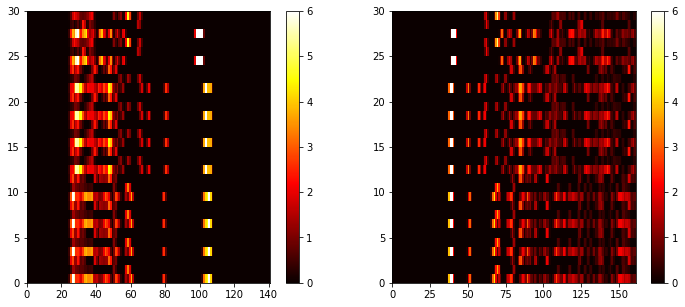

In [102]:
i = 0
j = i + 30
features = [
#    F.relu6(nn.global_mean_pool(inv_rdf_feat[i:j], atom_idx[i:j])),
#    F.relu6(nn.global_max_pool(inv_rdf_feat[i:j], atom_idx[i:j])),
#    F.relu6(nn.global_add_pool(inv_rdf_feat[i:j], atom_idx[i:j])),
    F.relu6(inv_rdf_feat[i:j]),
#    F.relu6(nn.global_mean_pool(rdf_feat[i:j], atom_idx[i:j])),
#    F.relu6(nn.global_max_pool(rdf_feat[i:j], atom_idx[i:j])),
#    F.relu6(nn.global_add_pool(rdf_feat[i:j], atom_idx[i:j])),
    F.relu6(rdf_feat[i:j]),]
ncol = 2
nrow = int(len(features)/2)
if len(features)%2 != 0: nrow += 1
f, axs = plt.subplots(nrow, ncol, figsize=(12, nrow*5))
for i, ax in enumerate(axs.reshape(-1)):
    im = ax.pcolormesh(features[i].numpy(), vmin=0, vmax=6, cmap='hot')
    f.colorbar(im, ax=ax, orientation='vertical')

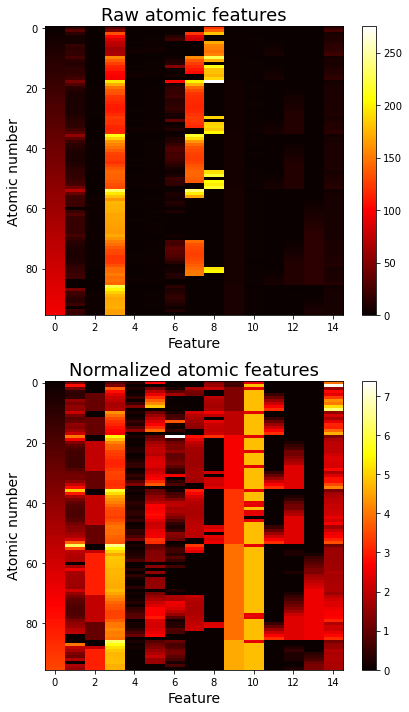

In [22]:
from util.input_data import Dataset
d = Dataset()

d1 = d.mat_atom_feats
d._scale_atom = True
d._load_mat_atom_feats()
d2 = d.mat_atom_feats
dm = [d1, d2]
f, axs = plt.subplots(2, 1, figsize=(6, 10))
for i, ax in enumerate(axs.reshape(-1)):
    im = ax.imshow(dm[i], cmap='hot', aspect='auto', vmin=0)
    f.colorbar(im, ax=ax, orientation='vertical')
    ax.set_ylabel('Atomic number', fontsize=14)
    ax.set_xlabel('Feature', fontsize=14)
axs[0].set_title('Raw atomic features', fontsize=18)
axs[1].set_title('Normalized atomic features', fontsize=18)
plt.tight_layout()


In [11]:
atom_feat[atom_idx == 0]

tensor([[1.8765, 1.8060, 1.0174, 3.7927, 0.7672, 2.5802, 1.2897, 1.9319, 2.3960,
         3.2736, 4.8060, 2.1250, 2.3525, 0.0000, 2.6535, 0.2887, 1.2334, 1.0174,
         1.7569, 0.5688, 4.2267, 0.0000, 0.0000, 1.7679, 1.3094, 4.8060, 2.1250,
         0.0000, 0.0000, 4.0108],
        [1.8765, 1.8060, 1.0174, 3.7927, 0.7672, 2.5802, 1.2897, 1.9319, 2.3960,
         3.2736, 4.8060, 2.1250, 2.3525, 0.0000, 2.6535, 0.8661, 0.6370, 2.0349,
         3.4023, 0.2593, 2.0396, 1.5122, 1.6781, 0.0000, 2.6189, 2.4030, 0.0000,
         1.1763, 0.0000, 1.9929],
        [1.8765, 1.8060, 1.0174, 3.7927, 0.7672, 2.5802, 1.2897, 1.9319, 2.3960,
         3.2736, 4.8060, 2.1250, 2.3525, 0.0000, 2.6535, 1.8765, 1.8060, 1.0174,
         3.7927, 0.7672, 2.5802, 1.2897, 1.9319, 2.3960, 3.2736, 4.8060, 2.1250,
         2.3525, 0.0000, 2.6535]])

In [23]:
from util.input_data import Dataset

fff = Dataset()
ttt = Dataset()
fff.load_dataset('C:/WORKSPACE_KRICT/DATA/data_snu/testdata_metal_FFF.pickle', True)
ttt.load_dataset('C:/WORKSPACE_KRICT/DATA/data_snu/testdata_metal_TTT.pickle', True)

20.71363327379605
34.218443242638955


C:\Users\KRICT\AppData\Local\Temp\ipykernel_19760\3970706181.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  axs[1].set_xticks(np.arange(9)*features[1].shape[1]/8, labels=['{:.2f}'.format(1/i) for i in np.linspace(0,2,9)])


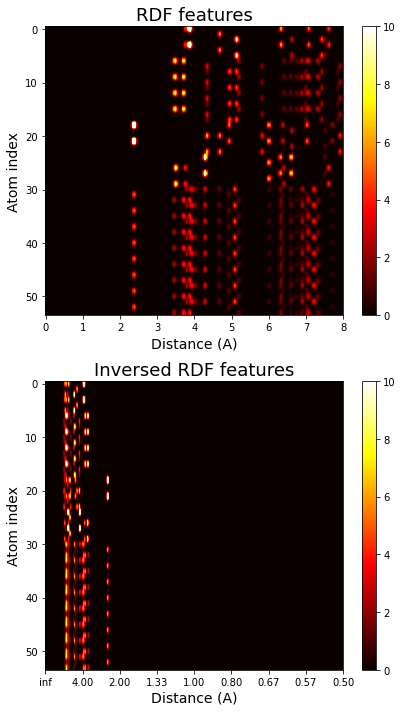

In [69]:
features = [
    ds.crystal[0].bdf_feature.numpy() for ds in [fff, ttt]
]
features = [rdf, irdf]

f, axs = plt.subplots(2, 1, figsize=(6, 10))
for i, ax in enumerate(axs):
    im = ax.imshow(features[i], cmap='hot', aspect='auto', vmin=0, vmax=10)
    f.colorbar(im, ax=ax, orientation='vertical')
    print(np.max(features[i]))
    ax.set_ylabel('Atom index', fontsize=14)
#    ax.set_xlabel('Angle (degree)', fontsize=14)
#    ax.set_xticks(np.arange(7)*features[i].shape[1]/6, labels=(np.arange(7)*180/6).astype(int))
    ax.set_xlabel('Distance (A)', fontsize=14)
#    ax.set_xticks(np.arange(9)*features[i].shape[1]/8, labels=np.arange(9))

axs[0].set_title('RDF features', fontsize=18)
axs[0].set_xticks(np.arange(9)*features[0].shape[1]/8, labels=np.arange(9))
axs[1].set_title('Inversed RDF features', fontsize=18)
axs[1].set_xticks(np.arange(9)*features[1].shape[1]/8, labels=['{:.2f}'.format(1/i) for i in np.linspace(0,2,9)])
plt.tight_layout()


In [89]:
rdf = fff.crystal[0].rdf_feature.numpy()
np.std(rdf), np.std(rdf[rdf > 1e-5])

(0.029326275, 0.056740183)

6.0
6.0
6.0


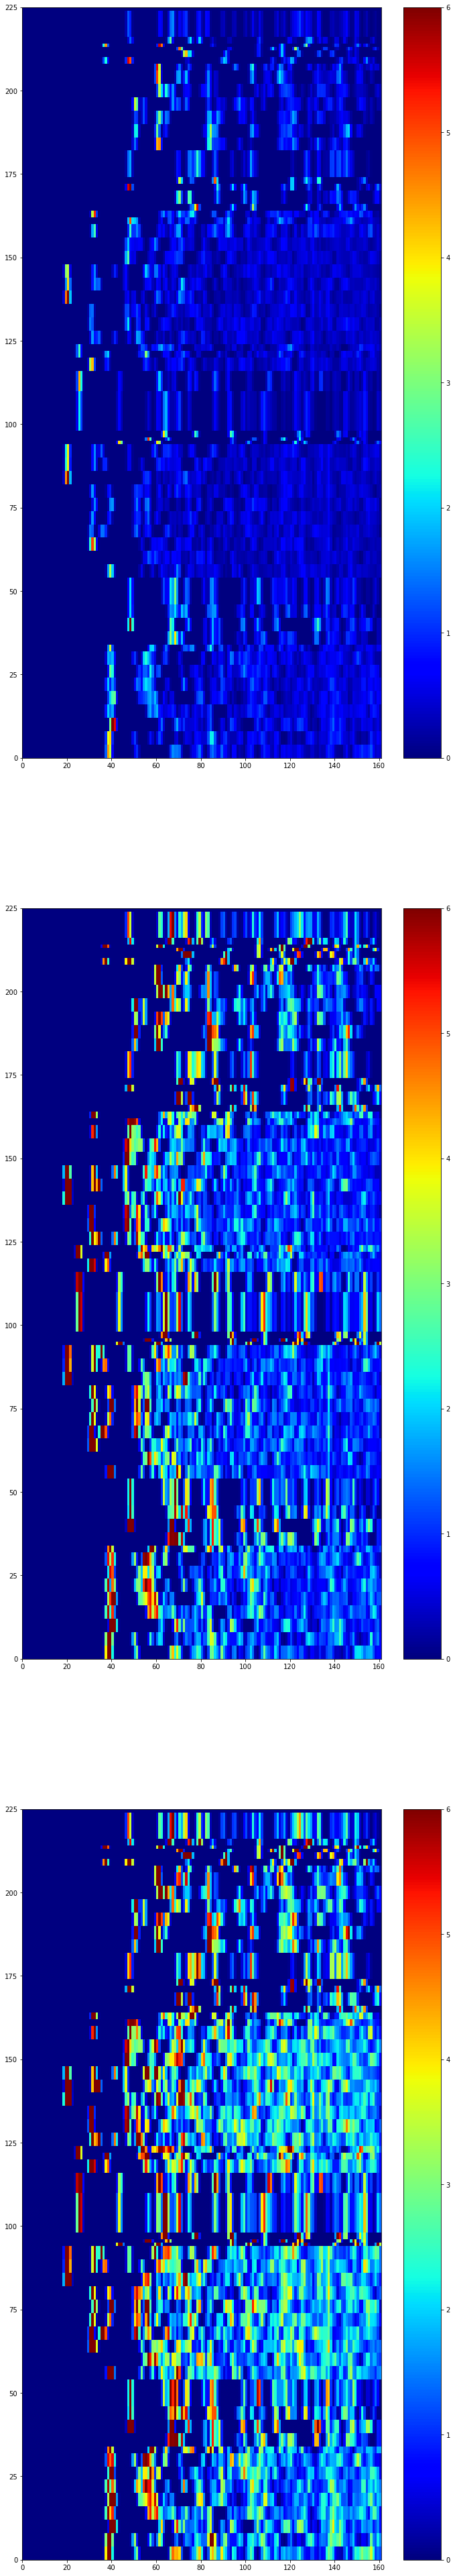

In [114]:
features = [
    F.relu6(nn.global_mean_pool(rdf_feat, atom_idx)),
    F.relu6(nn.global_max_pool(rdf_feat, atom_idx)),
    F.relu6(nn.global_add_pool(rdf_feat, atom_idx)),
]

f, axs = plt.subplots(3, 1, figsize=(12, 70))
for i, ax in enumerate(axs):
    im = ax.pcolormesh(features[i].numpy(), vmin=0, vmax=6, cmap='hot')
    f.colorbar(im, ax=ax, orientation='vertical')
    print(np.max(features[i].numpy()))

In [27]:
n_null = 0
total  = 0

for i, crystal in enumerate(dummy.crystal):
    nbr = crystal.idx_nbr
    n_null += np.sum(nbr.numpy() == -1)
    total  += nbr.reshape(-1).shape[0]
    if (i+1)%100 == 0:
        rate = 100.0*n_null/total
        print('{:.3f}% ({}/{})'.format(rate, n_null, total))
rate = 100.0*n_null/total
print('{:.3f}% ({}/{})'.format(rate, n_null, total))

0.449% (182/40572)
0.391% (290/74076)
0.347% (380/109398)
0.284% (422/148710)
0.254% (482/189954)
0.259% (574/221622)
0.291% (744/255774)
0.347% (1004/289482)
0.351% (1117/318576)
0.340% (1193/350538)
0.317% (1220/384720)
0.297% (1234/414924)
0.289% (1292/446604)
0.278% (1336/480402)
0.278% (1414/509424)
0.272% (1466/538482)
0.268% (1510/562704)
0.263% (1544/586986)
0.339% (2080/613236)
0.331% (2110/637050)
0.358% (2402/670182)
0.366% (2544/695304)
0.381% (2754/723018)
0.377% (2812/746730)
0.372% (2860/767808)
0.360% (2880/800928)
0.365% (3055/837846)
0.356% (3105/871554)
0.377% (3437/911922)
0.380% (3611/949266)
0.387% (3809/983376)
0.386% (3949/1023756)
0.393% (4147/1055784)
0.386% (4153/1075404)
0.380% (4153/1092324)
0.380% (4219/1111644)
0.374% (4219/1126896)
0.376% (4291/1140822)
0.403% (4725/1171794)
0.400% (4855/1214892)
0.401% (5027/1254234)
0.397% (5027/1266996)
0.393% (5035/1280856)
0.389% (5055/1300032)
0.386% (5109/1324278)
0.384% (5159/1343742)
0.382% (5195/1358670)
0.379%

In [3]:
feat = np.array([
    [i+1]*5 for i in range(5)
] + [[0,0,0,0,0]])

nidx = np.array([
    [ 0,  0, -1],
    [ 2, -1, -1],
    [ 1, 0, -1],
    [ 4, 4, 3],
    [ 3, 4, 3],
    [-1, -1, -1],
])
nfeat = feat[nidx]

In [22]:
tfeat = torch.tensor(feat).view(-1,1,5)
tnfeat = torch.tensor(nfeat)

In [24]:
torch.cat([tfeat, tnfeat], dim=1)

tensor([[[1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [0, 0, 0, 0, 0]],

        [[2, 2, 2, 2, 2],
         [3, 3, 3, 3, 3],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]],

        [[3, 3, 3, 3, 3],
         [2, 2, 2, 2, 2],
         [1, 1, 1, 1, 1],
         [0, 0, 0, 0, 0]],

        [[4, 4, 4, 4, 4],
         [5, 5, 5, 5, 5],
         [5, 5, 5, 5, 5],
         [4, 4, 4, 4, 4]],

        [[5, 5, 5, 5, 5],
         [4, 4, 4, 4, 4],
         [5, 5, 5, 5, 5],
         [4, 4, 4, 4, 4]],

        [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]]], dtype=torch.int32)

In [36]:
from util.input_data import Dataset
from pymatgen.core.structure import Structure
import torch

for scale in ['FTT','TFF','TTT']:
    if dummy: del dummy
    gc.collect()
    dummy = Dataset()
    dummy.load_dataset(f'C:\WORKSPACE_KRICT\DATA\data_snu\inputdata_metal_{scale}.pickle', silent=True)

    for cry in tqdm.tqdm(dummy.crystal):
        poscar = 'C:\WORKSPACE_KRICT\DATA\data_snu\with_metal\source\POSCAR_ICSD-{}'.format(cry.id)
        crystr = Structure.from_file(poscar)
        atomic_numbers = np.array(crystr.atomic_numbers) - 1
        element = sorted(set(atomic_numbers))
        i_ele = torch.tensor([[element.index(an)]*len(element) for an in atomic_numbers], dtype=torch.long).view(-1)
        cry.idx_ele1 = i_ele
        cry.idx_ele2 = cry.idx_ele
        del cry.idx_ele

    dummy.save_dataset(f'C:\WORKSPACE_KRICT\DATA\data_snu\inputdata_metal_{scale}.pickle', silent=True)

100%|██████████| 18605/18605 [00:10<00:00, 1750.94it/s]


In [65]:
dataset.load_dataset('C:\WORKSPACE_KRICT\DATA\data_snu\inputdata_metal_TFF.pickle')
i = 10
print(dataset.crystal[i].idx_nbr[0])

idx_nbr = dataset.crystal[i].idx_nbr[0].clone()
idx_nbr += 5

print(dataset.crystal[i].idx_nbr[0])

* Data ==============================================
   data path       : c:/WORKSPACE_KRICT/DATA/data_snu/with_metal
   n_Crystals      : 18605
* Function ==========================================
   RDF r_max       : 8
   RDF d_r         : 0.05
   RDF n_features  : 161
   BDF r_max       : 5
   BDF d_theta     : 0.02
   BDF n_features  : 159
* Others ============================================
   n_atom_features : 11
   atom_features   : [
               "atomic_number",
               "atomic_volume",
               "block",
               "covalent_radius_pyykko",
               "electron_affinity",
               "electronic_configuration",
               "en_pauling",
               "fusion_heat",
               "metallic_radius",
               "vdw_radius_bondi",
               "period"
]
* Scale data ========================================
   atom_features   : True
   rdf_features    : False
   bdf_features    : False
tensor([14, 22, 23, 13, 25, 12], dtype=torch.int32)
ten

In [37]:
%load_ext autoreload
%autoreload 2

from util.trainer_graph import collate_fn

In [63]:
inbr0 = dataset.crystal[2].idx_nbr.clone()

In [66]:
_,_,_,aidx,eidx,nidx,gidx,_,_,_ = collate_fn(dataset.crystal[0:12])
for ai, ni in zip(aidx.cpu().numpy(), nidx.cpu().numpy()):
    print(ai, ni)

0 tensor(34, dtype=torch.int32)
tensor(34, dtype=torch.int32) tensor(20, dtype=torch.int32)
tensor(54, dtype=torch.int32) tensor(40, dtype=torch.int32)
tensor(94, dtype=torch.int32) tensor(22, dtype=torch.int32)
tensor(116, dtype=torch.int32) tensor(40, dtype=torch.int32)
tensor(156, dtype=torch.int32) tensor(8, dtype=torch.int32)
tensor(164, dtype=torch.int32) tensor(18, dtype=torch.int32)
tensor(182, dtype=torch.int32) tensor(26, dtype=torch.int32)
tensor(208, dtype=torch.int32) tensor(16, dtype=torch.int32)
tensor(224, dtype=torch.int32) tensor(40, dtype=torch.int32)
tensor(264, dtype=torch.int32) tensor(36, dtype=torch.int32)
tensor(300, dtype=torch.int32) tensor(36, dtype=torch.int32)
0 [13 28 27 23 15 19]
0 [11  9  8 11  8 10]
0 [4 7 5 7 4 2]
1 [12 29 26 22 14 18]
1 [10  8  9 10  9 11]
1 [5 6 4 6 5 3]
2 [15 30 25 21 13 17]
2 [ 9 11 10  9 10  8]
2 [6 5 7 5 6 0]
3 [14 31 24 20 12 16]
3 [ 8 10 11  8 11  9]
3 [7 4 6 4 7 1]
4 [23 16 32 31 27 26]
4 [11 10  8  8 10  9]
4 [6 0 3 1 3 0]
5

In [59]:
inbr1 = inbr0.clone()
#inbr1[inbr1 != -1] += 33

In [64]:
inbr0, inbr1

(tensor([[198, 194, 195, 201, 197, 199],
         [186, 179, 184, 185, 189, 180],
         [173, 170, 171, 172, 172, 171],
         ...,
         [170, 173, 172, 173, 171, 173],
         [166, 169, 167, 168, 169, 168],
         [165, 162, 163, 163, 162, 164]], dtype=torch.int32),
 tensor([[111, 116, 118, 119, 117, 120],
         [107, 108, 108, 106, 109, 109],
         [103, 103, 104, 104, 104, 104],
         [110, 119, 117, 118, 116, 115],
         [106, 109, 109, 107, 108, 108],
         [102, 102, 105, 105, 105, 105],
         [113, 114, 120, 121, 115, 116],
         [109, 106, 106, 108, 107, 107],
         [105, 105, 102, 102, 102, 102],
         [112, 121, 115, 114, 120, 117],
         [108, 107, 107, 109, 106, 106],
         [104, 104, 103, 103, 103, 103],
         [120, 114, 110, 115, 121, 111],
         [107, 107, 108, 108, 108, 108],
         [103, 104, 104, 102, 105, 105],
         [115, 121, 111, 120, 114, 110],
         [106, 106, 109, 109, 109, 109],
         [102, 105, 10